In [96]:
from qiskit import *
from qiskit.visualization import plot_histogram

[['0', '0', '1', '1'], ['0', '1', '0', '0'], ['0', '1', '0', '1'], ['1', '0', '1', '1'], ['1', '1', '1', '1']]


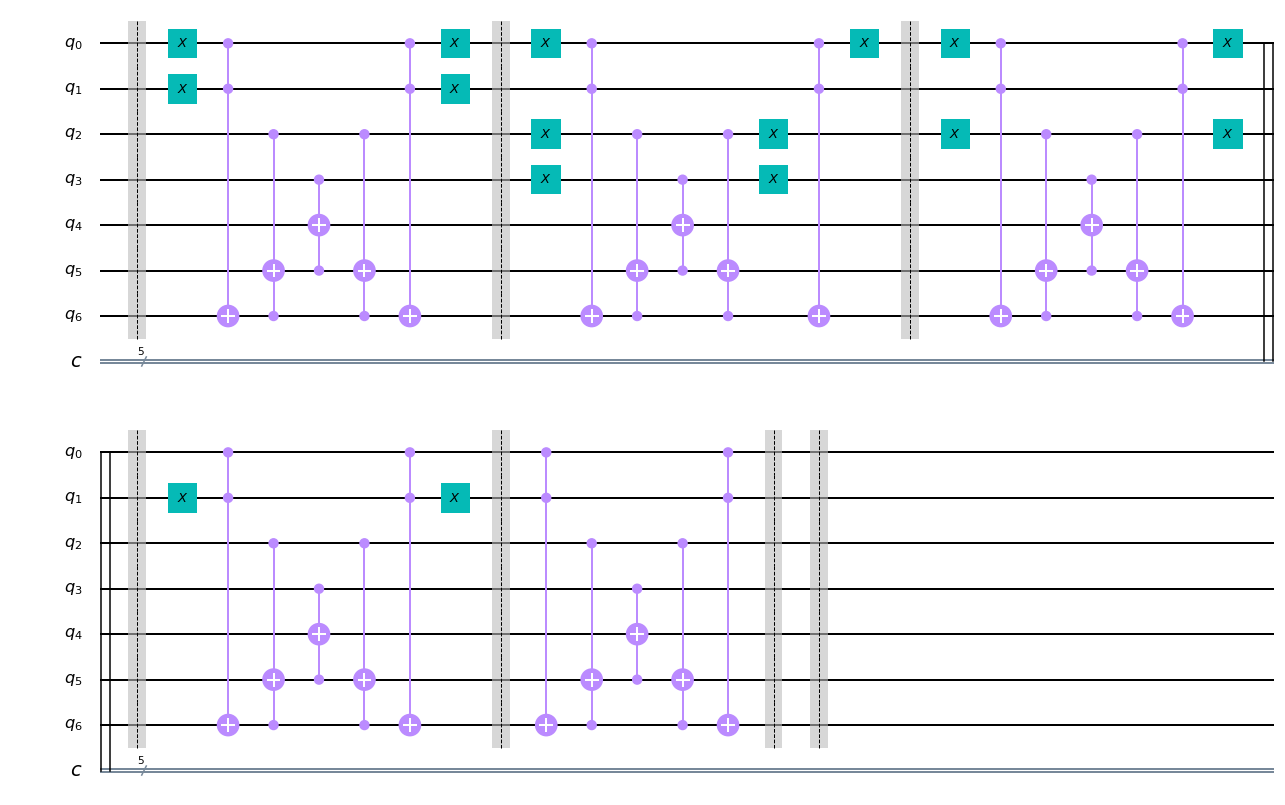

In [227]:
#ship_coords = (10, 14, 15, 0, 1, 8, 9) # Imagina un mapa como este:
ship_coords = [3,4, 5, 11, 15]
binary_coords = []

#  0    1    2    3  
#  4    5    6    7
#  8    9    10   11
#  12   13   14   15


for i in range(len(ship_coords)):
    binary_coords.append(list(format(ship_coords[i], '04b')))

print(binary_coords)

game_operator = QuantumCircuit(7, 5)
game_operator.barrier(range(7))

for coord in binary_coords:
    
    for j, i in reversed(list(enumerate(coord))):
        if i == '0':
            game_operator.x(j)
            
    game_operator.ccx(0,1,6)
    game_operator.ccx(2,6,5)
    game_operator.ccx(3,5,4)
    game_operator.ccx(2,6,5)
    game_operator.ccx(0,1,6)
    
    for j, i in reversed(list(enumerate(coord))):
        if i == '0':
            game_operator.x(j)
    game_operator.barrier(range(7))
            
game_operator.barrier(range(7))


"""   game_operator haría lo siguiente:

       _____
|x>---|     |---|x>
      |  G  |
|0>---|_____|---|G(x)>


siendo:  | G(x) = 0 si es agua
         | G(x) = 1 si es tocado


"""

game_operator.draw(output = 'mpl')

In [230]:
guess = [2, 5, 14, 15]
print("Original Ship Positions: ")
print(ship_coords)
print()
print("Results:")
for shot in guess:
    quest_operator = QuantumCircuit(7, 5)
    binary_guess = format(shot, '04b')
    i = 0
    for qubit in binary_guess:
        if (qubit == '1'): quest_operator.x(i)
        i += 1

    circ = quest_operator + game_operator

    circ.measure(range(5), range(5))
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, shots=1)
    result = job.result()
    counts = result.get_counts(circ)
    print("Shot: %s - %s" % (shot, list(counts.keys())[0][:1]))

Original Ship Positions: 
[3, 4, 5, 11, 15]

Results:
Shot: 2 - 0
Shot: 5 - 1
Shot: 14 - 0
Shot: 15 - 1


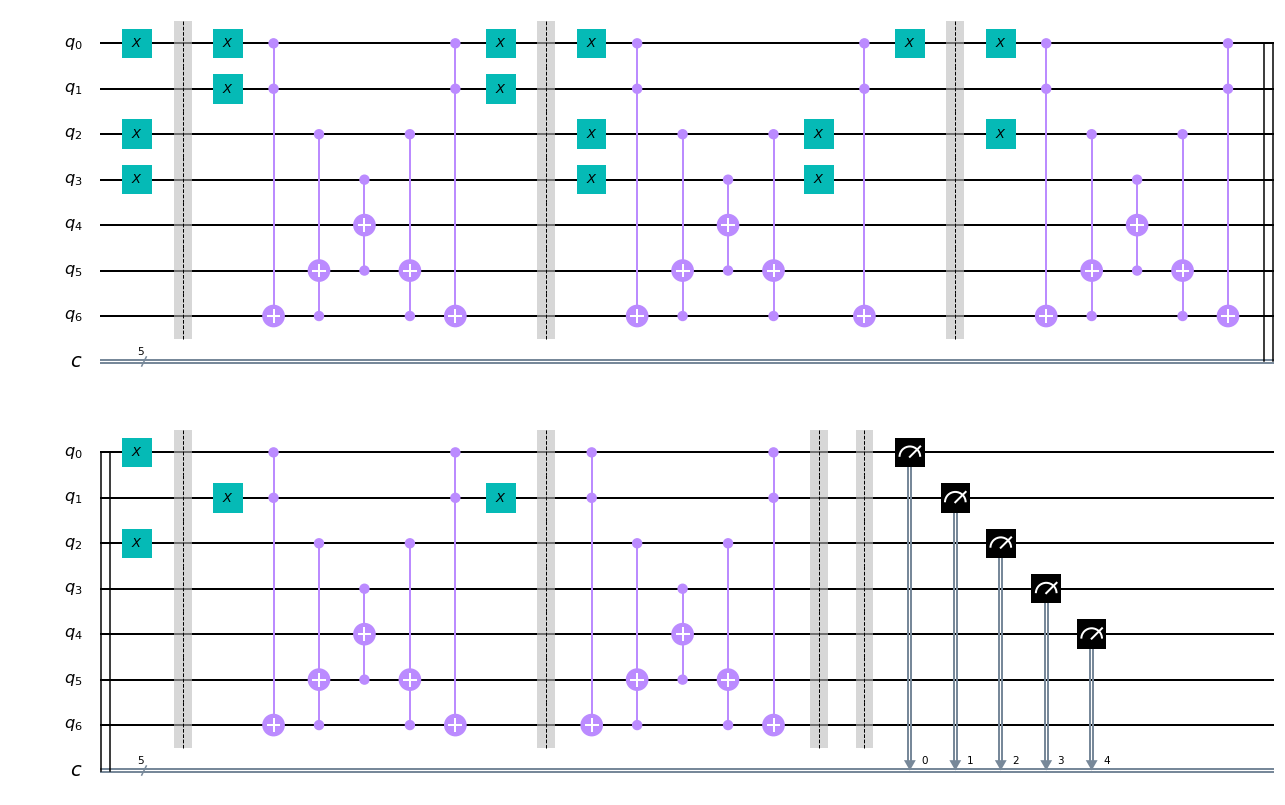

In [229]:
circ.draw('mpl')